In [1]:
from env import simGym
from ppo_network import PolicyNetwork
import numpy as np
from data import Trajectory, Buffer
import pickle
from datetime import datetime

In [2]:
n_actions = 1
n_states = 2
n_steps = 200  # steps for per episode
n_episodes = 10
n_steps_per_learn = n_episodes * n_steps
# pn = Agent(n_states, 
#                  n_actions, 
#                  n_steps, 
#                  n_episodes)
pn = PolicyNetwork(n_states, 
                 n_actions, 
                 n_steps, 
                 n_steps_per_learn)
t = Trajectory()
buffer = Buffer(n_states, n_actions, n_episodes, n_steps)

In [4]:
sim = simGym()
observation, info = sim.reset()
training_times = 3000
reward_list = []
for times in range(training_times):
    if pn.current_training_time%500 == 0: # auto save model
        current_date_and_time = datetime.now()
        name = str(times) + "-" + str(current_date_and_time) + ".model"
        with open(name, "wb") as f: 
            pickle.dump(pn, f)
    buffer.reset()
    for i in range(n_episodes):
        t.reset()
        for _ in range(n_steps):
            actions = pn.infer(state=observation, noise=True)
            # actions = pn.get_action(observation)
            observation, reward, terminated, truncated, info = sim.step(actions)
            if terminated or truncated:
                observation, info = sim.reset()
            t.add(observation, actions, reward)
        observation, info = sim.reset()
        buffer.add(t)
    print(times, np.mean(buffer.rewards))
    reward_list.append(np.mean(buffer.rewards))
    pn.learn(buffer)


0 -0.09769158827526167
1 -0.09636545007541104
2 -0.09938505405761469
3 -0.09934617433103314
4 -0.10940762914931774
5 -0.1006551574193266
6 -0.10386123534723331
7 -0.09937317746034859
8 -0.09704061884992524
9 -0.09766735648517834
10 -0.09687063947988625
11 -0.0962820619129646
12 -0.10118302342385233
13 -0.1049439308693812
14 -0.10158357904651777
15 -0.10067041439335109
16 -0.10017916448983082
17 -0.09694944161139853
18 -0.10257831612646505
19 -0.09722594484522391
20 -0.09996892183802836
21 -0.0987739377278594
22 -0.10165507490333184
23 -0.09852151824970129
24 -0.09658477357009781
25 -0.09852089442308389
26 -0.0973348249420152
27 -0.10748033349118367
28 -0.10843092467214421
29 -0.02042618382769306
30 -0.10870914917729353
31 -0.006598374879421733
32 -0.06289874065841626
33 -0.017135890776913246
34 -0.02018754194094338
35 0.16628537796255188
36 -0.02489529623414687
37 0.06648931219117529
38 0.02707225363997108
39 -0.01420751131223107
40 -0.10949465541535003
41 -0.015471587730723116
42 -0.0

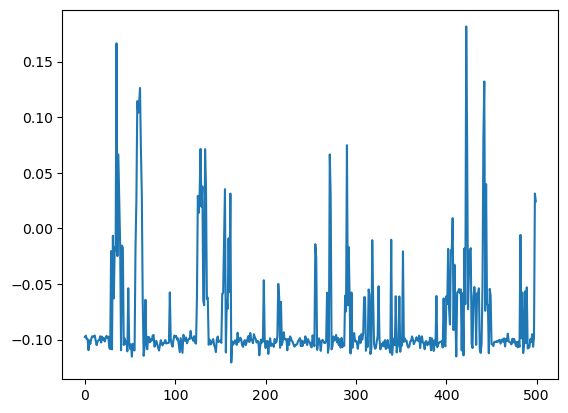

In [8]:
import matplotlib.pyplot as plt
plt.plot(reward_list)

In [10]:
# show results
sim = simGym(render_mode=True)
observation, info = sim.reset()
for _ in range(300):
            actions = pn.infer(state=observation, noise=None)
            observation, reward, terminated, truncated, info = sim.step(actions)
            if terminated or truncated:
                observation, info = sim.reset()
                break

In [14]:
with open("499-2024-04-09 13:01:57.811687.model", "rb") as f: # "rb" because we want to read in binary 
    pn = pickle.load(f)